<a href="https://colab.research.google.com/github/cokungu1/china-repo/blob/main/DSA8203_CAT_I_CKungu_ID_191336%E2%80%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###User Segmentation Customers for Marketing in China Using Mobile App Usage


Companies in China face a competitive landscape with increasing mobile phone penetration and usage. This project analyzes user data to segment customers based on app usage, demographics, and device characteristics. By understanding user behavior, companies can tailor their campaigns, and products offering by optimizing app features, and boosting engagement for increased revenue.

Dataset description

App_event.csv - Details on App is installed and used actively or not


Dataset description

* App_event.csv - Details on App is installed and used actively or not
* App_labels.csv - Apps and their labels, the label_id can be used to join withlabel categories
* events.csv - Event data has an event id, location detail (lat/long), and  timestamp when the user isusing an app on his device
* gender_age.csv - details of users age & gender
* label_categories.csv - Apps' labels and their categories
* phone_device.csv - Device ids, brand, and models name.


App_labels.csv - Apps and their labels, the label_id can be used to join with label categories
events.csv - Event data has an event id, location detail (lat/long), and timestamp when the user isusing an app on his device
gender_age.csv - details of users age & gender
label_categories.csv - Apps' labels and their categories
phone_device.csv - Device ids, brand, and models name. here the brand names are in Chinese, you can convert it in English using google for better understanding but we will not do it here. We will use this as a profiling variable, not as a clustering variable

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import gdown


In [ ]:
def reduce_mem_usage(df):
    """
    Reduce memory usage of a Pandas DataFrame by downcasting numeric dtypes.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
!pip install googletrans  # Install the library


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=4b26a2d946174e261dad411800b60e4c6d22b60b7efdd72e8dd69cc21b2ad90f
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succes

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the folder path in your Google Driventent/drive/MyDrive/DSA 8203 projects PRI
folder_path= '/content/drive/MyDrive/DSA 8203 projects PRINCIPLES OF DATA SCIENCE'

In [ ]:
# Load and optimize each CSV file
app_events_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/app_events.csv'))
app_labels_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/app_labels.csv'))
events_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/events.csv'))
gender_age_test_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/gender_age_test.csv'))
gender_age_train_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/gender_age_train.csv'))
label_categories_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/label_categories.csv'))
phone_device_df = reduce_mem_usage(pd.read_csv(f'{folder_path}/phone_device.csv'))

Memory usage of dataframe is 991.00 MB
Memory usage after optimization is: 433.56 MB
Decreased by 56.2%
Memory usage of dataframe is 7.02 MB
Memory usage after optimization is: 4.39 MB
Decreased by 37.5%
Memory usage of dataframe is 124.09 MB
Memory usage after optimization is: 82.66 MB
Decreased by 33.4%
Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.86 MB
Decreased by 0.0%
Memory usage of dataframe is 2.28 MB
Memory usage after optimization is: 0.78 MB
Decreased by 65.6%
Memory usage of dataframe is 0.01 MB
Memory usage after optimization is: 0.04 MB
Decreased by -190.5%
Memory usage of dataframe is 4.29 MB
Memory usage after optimization is: 2.22 MB
Decreased by 48.1%


In [ ]:
# Check the number of rows and columns in each CSV file
print(f"app_events_df: {app_events_df.shape}")
print(f"app_labels_df: {app_labels_df.shape}")
print(f"events_df: {events_df.shape}")
print(f"gender_age_test_df: {gender_age_test_df.shape}")
print(f"gender_age_train_df: {gender_age_train_df.shape}")
print(f"label_categories_df: {label_categories_df.shape}")
print(f"phone_device_df: {phone_device_df.shape}")

app_events_df: (32473067, 4)
app_labels_df: (459943, 2)
events_df: (3252950, 5)
gender_age_test_df: (112071, 1)
gender_age_train_df: (74645, 4)
label_categories_df: (930, 2)
phone_device_df: (187245, 3)


In [ ]:
# Summary statistics for each CSV file
print("\nSummary Statistics:")
print(f"app_events_df:\n{app_events_df.describe()}")
print(f"app_labels_df:\n{app_labels_df.describe()}")
print(f"events_df:\n{events_df.describe()}")
print(f"gender_age_test_df:\n{gender_age_test_df.describe()}")
print(f"gender_age_train_df:\n{gender_age_train_df.describe()}")
print(f"label_categories_df:\n{label_categories_df.describe()}")
print(f"phone_device_df:\n{phone_device_df.describe()}")


Summary Statistics:
app_events_df:
           event_id        app_id  is_installed     is_active
count  3.247307e+07  3.247307e+07    32473067.0  3.247307e+07
mean   1.625564e+06  1.182779e+18           1.0  3.921094e-01
std    9.384682e+05  5.360173e+18           0.0  4.882209e-01
min    2.000000e+00 -9.221157e+18           1.0  0.000000e+00
25%    8.134720e+05 -3.474568e+18           1.0  0.000000e+00
50%    1.626907e+06  1.387044e+18           1.0  0.000000e+00
75%    2.441106e+06  6.043001e+18           1.0  1.000000e+00
max    3.252948e+06  9.222488e+18           1.0  1.000000e+00
app_labels_df:
             app_id       label_id
count  4.599430e+05  459943.000000
mean   1.912461e+17     664.849749
std    5.269442e+18     192.797736
min   -9.223281e+18       2.000000
25%   -4.305882e+18     548.000000
50%    1.083204e+17     714.000000
75%    4.830475e+18     795.000000
max    9.223318e+18    1021.000000


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/pandas/core/nano

events_df:
           event_id     device_id     longitude      latitude
count  3.252950e+06  3.252950e+06  3.252950e+06  3.252950e+06
mean   1.626476e+06 -2.685140e+16           NaN           NaN
std    9.390459e+05  5.301236e+18  0.000000e+00  0.000000e+00
min    1.000000e+00 -9.222957e+18 -1.800000e+02 -3.843750e+01
25%    8.132382e+05 -4.616259e+18  0.000000e+00  0.000000e+00
50%    1.626476e+06 -1.729953e+16  1.129375e+02  2.801562e+01
75%    2.439713e+06  4.549750e+18  1.171875e+02  3.406250e+01
max    3.252950e+06  9.222540e+18  1.747500e+02  5.993750e+01
gender_age_test_df:
          device_id
count  1.120710e+05
mean  -2.367461e+16
std    5.331855e+18
min   -9.223322e+18
25%   -4.661036e+18
50%   -3.107321e+16
75%    4.581985e+18
max    9.223069e+18
gender_age_train_df:
          device_id           age
count  7.464500e+04  74645.000000
mean  -7.491354e+14     31.410342
std    5.327150e+18      9.868735
min   -9.223067e+18      1.000000
25%   -4.617367e+18     25.000000
50%   

## Reducing the data files to make it possible for merging and as well minimising crushing up of the cells.

In [ ]:
# Randomly sample rows for datasets exceeding 200,000 rows
max_rows = 200000

if app_events_df.shape[0] > max_rows:
    app_events_df = app_events_df.sample(n=max_rows, random_state=42)

if app_labels_df.shape[0] > max_rows:
    app_labels_df = app_labels_df.sample(n=max_rows, random_state=42)

if events_df.shape[0] > max_rows:
    events_df = events_df.sample(n=max_rows, random_state=42)

if gender_age_train_df.shape[0] > max_rows:
    gender_age_train_df = gender_age_train_df.sample(n=max_rows, random_state=42)

# Check the number of rows and columns in each CSV file
print(f"app_events_df: {app_events_df.shape}")
print(f"app_labels_df: {app_labels_df.shape}")
print(f"events_df: {events_df.shape}")
print(f"gender_age_test_df: {gender_age_test_df.shape}")
print(f"gender_age_train_df: {gender_age_train_df.shape}")
print(f"label_categories_df: {label_categories_df.shape}")
print(f"phone_device_df: {phone_device_df.shape}")

app_events_df: (200000, 4)
app_labels_df: (200000, 2)
events_df: (200000, 5)
gender_age_test_df: (112071, 1)
gender_age_train_df: (74645, 4)
label_categories_df: (930, 2)
phone_device_df: (187245, 3)


In [ ]:

# Check for duplicates based on "device_id" in phone_device_df
duplicate_devices = pd.concat(g for _, g in phone_device_df.groupby("device_id") if len(g) > 1)

In [ ]:

# Drop duplicates from the phone_device_df DataFrame (keep only the first occurrence)
phone_device_df = phone_device_df.drop_duplicates(subset=['device_id'], keep='first')


In [ ]:
phone_device2 = phone_device_df.drop_duplicates(subset=['device_id'])

# Check if duplicates were dropped
print("Original DataFrame Shape:", phone_device_df.shape)
print("DataFrame Shape After Dropping Duplicates:", phone_device2.shape)

if phone_device2.shape[0] < phone_device_df.shape[0]:
    print("Duplicates were dropped")
else:
    print("No duplicates were dropped")

# Display the DataFrames to visually confirm
print("\nOriginal DataFrame:")
phone_device_df.head(5)


Original DataFrame Shape: (186716, 3)
DataFrame Shape After Dropping Duplicates: (186716, 3)
No duplicates were dropped

Original DataFrame:


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2




## Merging the data files to aid in the study

In [ ]:

print("\nDataFrame After Dropping Duplicates:")
phone_device2.head(5)


DataFrame After Dropping Duplicates:


,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [ ]:
# Merge app_events and app_labels
app_event_label = pd.merge(app_events_df, app_labels_df, on='app_id', how='inner')

In [ ]:

# Drop 'app_id' column
app_event_label.drop(['app_id'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe
app_event_label.head()

,event_id,is_installed,is_active,label_id
0,2573805,1,0,405
1,2573805,1,0,811
2,1409107,1,0,549
3,1409107,1,0,548
4,1409107,1,0,710


In [ ]:

# Merge app_event_label with events
app_event_label2 = pd.merge(app_event_label, events_df, on='event_id', how='inner')


# Drop 'event_id' column
app_event_label2.drop(['event_id'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe
app_event_label2.head()

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000
3,1,1,549,-7707847491347618527,2016-05-06 05:30:03,0.0000,0.0000
4,1,0,405,-593198455553939395,2016-05-01 00:00:21,0.0000,0.0000


In [ ]:

# Merge app_event_label2 with gender_age
app_event_label_gender = pd.merge(app_event_label2, gender_age_train_df, on='device_id', how='left')  # Assuming 'gender_age' is the correct name for the DataFrame


# Display the first few rows of the merged dataframe
app_event_label_gender.head()

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,NaN,NaN,NaN
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN
3,1,1,549,-7707847491347618527,2016-05-06 05:30:03,0.0000,0.0000,M,44.0,M39+
4,1,0,405,-593198455553939395,2016-05-01 00:00:21,0.0000,0.0000,NaN,NaN,NaN


In [ ]:
# Merge app_event_label_gender with label_categories
app_event_label_gender2 = pd.merge(app_event_label_gender, label_categories_df, on='label_id', how='left')

# Display the first few rows of the merged dataframe
app_event_label_gender2.head()

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group,category
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,NaN,NaN,NaN,unknown
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Industry tag
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Services 1
3,1,1,549,-7707847491347618527,2016-05-06 05:30:03,0.0000,0.0000,M,44.0,M39+,Property Industry 1.0
4,1,0,405,-593198455553939395,2016-05-01 00:00:21,0.0000,0.0000,NaN,NaN,NaN,Custom label


In [ ]:
# Merge app_event_label_gender2 with phone_device
app_event_label_gender_phone = pd.merge(app_event_label_gender2, phone_device_df, on='device_id', how='left')

# Display the first few rows of the merged dataframe
app_event_label_gender_phone.head()

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group,category,phone_brand,device_model
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,NaN,NaN,NaN,unknown,华为,荣耀6
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Industry tag,NaN,NaN
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Services 1,NaN,NaN
3,1,1,549,-7707847491347618527,2016-05-06 05:30:03,0.0000,0.0000,M,44.0,M39+,Property Industry 1.0,vivo,X5V
4,1,0,405,-593198455553939395,2016-05-01 00:00:21,0.0000,0.0000,NaN,NaN,NaN,Custom label,OPPO,R3


## composition of the data set following merging of the variabes data files

In [ ]:
app_event_label_gender_phone.shape

(34511, 13)

In [ ]:
app_event_label_gender_phone.dtypes

,0
is_installed,int8
is_active,int8
label_id,int16
device_id,int64
timestamp,category
longitude,float16
latitude,float16
gender,category
age,float64
group,category


In [ ]:
China = app_event_label_gender_phone

# Display the first few rows of China
China.head(3)

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group,category,phone_brand,device_model
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,NaN,NaN,NaN,unknown,华为,荣耀6
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Industry tag,NaN,NaN
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Services 1,NaN,NaN


In [ ]:
# 1. Data Distribution (Descriptive Statistics)
print("Descriptive Statistics:")
print(China.describe(include='all'))

# 2. Missing Data (Identifying Missing Values)
print("\nMissing Data:")
print(China.isnull().sum())

# 3. Missing Value Percentages
print("\nMissing Value Percentages:")
total_rows = China.shape[0]
for col in China.columns:
    missing_percentage = China[col].isnull().sum() / total_rows * 100
    print(f"{col}: {missing_percentage:.2f}%")

# 4. Data Distribution (Value Counts for Categorical Features)
print("\nData Distribution (Categorical Features):")
for col in China.columns:
    if China[col].dtype == 'object':
        print(f"\n{col}:")
        print(China[col].value_counts(normalize=True) * 100)

Descriptive Statistics:
        is_installed     is_active      label_id     device_id  \
count        34511.0  34511.000000  34511.000000  3.451100e+04   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean             1.0      0.333807    591.139202 -2.985015e+16   
std              0.0      0.471578    237.780921  5.341480e+18   
min              1.0      0.000000      6.000000 -9.222957e+18   
25%              1.0      0.000000    405.000000 -4.615506e+18   
50%              1.0      0.000000    704.000000 -1.256681e+17   
75%              1.0      1.000000    756.000000  4.662258e+18   
max              1.0      1.000000   1020.000000  9.221586e+18   

                  timestamp  longitude      latitude gender           age  \
count                 34511  34511.000  3.451100e+04  13206  13206.000000   
unique                 9516  

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


General Data Inspection on Some Variables.

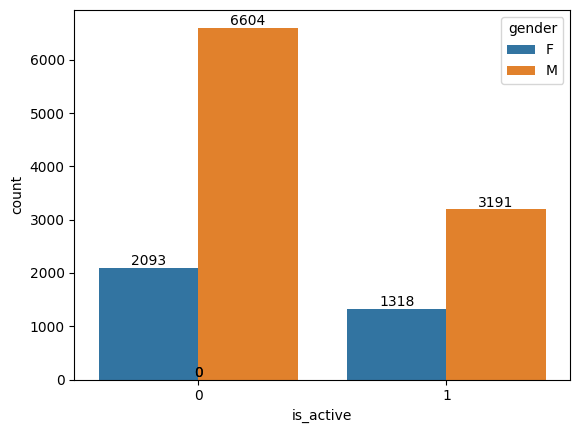

In [ ]:
# Create the countplot with value annotations
ax = sns.countplot(x='is_active', hue='gender', data=China)


# Add value annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

From the above it is clear the Male are majority persons on utilising and as well not utilising the apps. There may be underlying factors to these that need to investigated further.

In [ ]:
China["gender"].value_counts(normalize="True")

,proportion
gender,
M,0.741708
F,0.258292


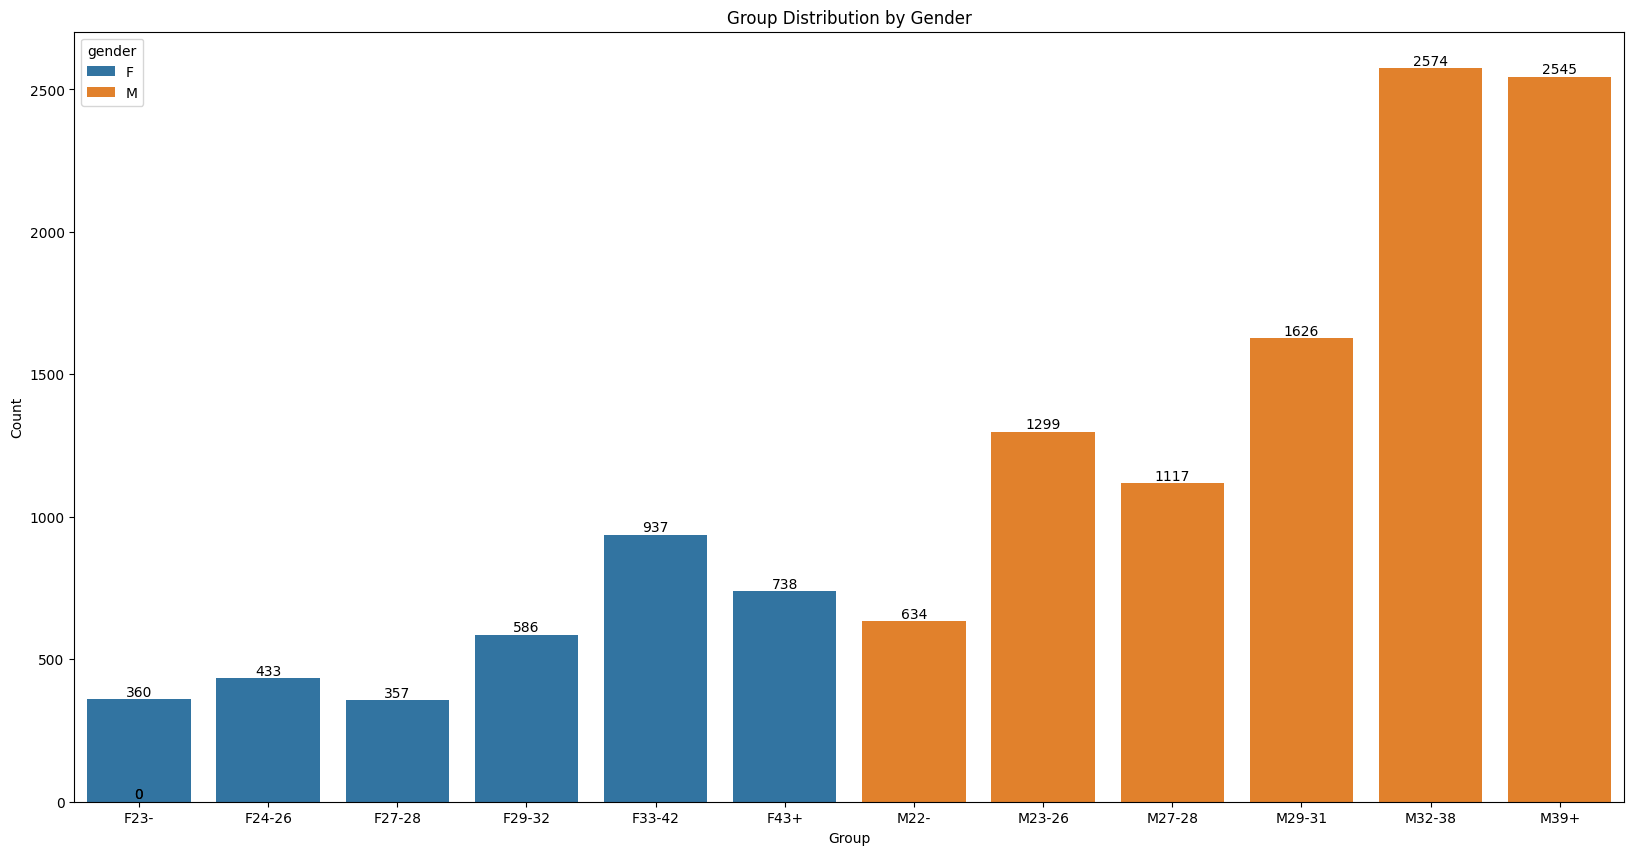

In [ ]:
# Plot Age Group Distribution By Gender
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

# Create the countplot with value annotations
ax = sns.countplot(x='group', hue='gender', data=China)
plt.title('Group Distribution by Gender')
plt.xlabel('Group')
plt.ylabel('Count')

# Add value annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

In [ ]:
China["group"].value_counts(normalize="True")

,proportion
group,
M32-38,0.194911
M39+,0.192715
M29-31,0.123126
M23-26,0.098364
M27-28,0.084583
F33-42,0.070953
F43+,0.055884
M22-,0.048008
F29-32,0.044374


The age group above 29 appears to be an interesting group as they contribute the highest number of population with mobile phone, thus clear target group for company while marketing their products.

In [ ]:
China["category"].value_counts()

,count
category,
Industry tag,3894
Property Industry 2.0,2483
Property Industry 1.0,2406
unknown,2089
Custom label,1580
...,...
Scheduling,0
Features,0
SPA / Health Center,0


In [ ]:
import pandas as pd
from googletrans import Translator

# Set up the translator
translator = Translator()

# Function to translate Chinese text to English
def translate_chinese(text):
    """
    Translates Chinese text to English using Google Translate.

    Args:
        text: The Chinese text to translate.

    Returns:
        The translated English text, or the original text if translation fails.
    """
    try:
        translation = translator.translate(text, dest='en').text
        return translation
    except Exception as e:
        print(f"Translation failed for '{text}': {e}")
        return text

# Translate the 'phone_brand' column
China['phone_brand_eng'] = China['phone_brand'].apply(translate_chinese)

print(China[['phone_brand', 'phone_brand_eng']].head())

Translation failed for 'E人E本': 'NoneType' object has no attribute 'group'
Translation failed for 'E派': 'NoneType' object has no attribute 'group'
Translation failed for 'HTC': 'NoneType' object has no attribute 'group'
Translation failed for 'LG': 'NoneType' object has no attribute 'group'
Translation failed for 'LOGO': 'NoneType' object has no attribute 'group'
Translation failed for 'Lovme': 'NoneType' object has no attribute 'group'
Translation failed for 'MIL': 'NoneType' object has no attribute 'group'
Translation failed for 'OPPO': 'NoneType' object has no attribute 'group'
Translation failed for 'PPTV': 'NoneType' object has no attribute 'group'
Translation failed for 'SUGAR': 'NoneType' object has no attribute 'group'
Translation failed for 'TCL': 'NoneType' object has no attribute 'group'
Translation failed for 'ZOYE': 'NoneType' object has no attribute 'group'
Translation failed for 'ZUK': 'NoneType' object has no attribute 'group'
Translation failed for 'vivo': 'NoneType' ob

In [ ]:
import re

# Convert to string (if necessary)
China['phone_brand'] = China['phone_brand'].astype(str)

# Remove non-alphabetic characters
China['phone_brand'] = China['phone_brand'].apply(lambda x: re.sub('[^a-zA-Z]+', '', x))

China.head()

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group,category,phone_brand,device_model,phone_brand_eng
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,NaN,NaN,NaN,unknown,,荣耀6,华为
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Industry tag,nan,NaN,NaN
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,NaN,NaN,NaN,Services 1,nan,NaN,NaN
3,1,1,549,-7707847491347618527,2016-05-06 05:30:03,0.0000,0.0000,M,44.0,M39+,Property Industry 1.0,vivo,X5V,vivo
4,1,0,405,-593198455553939395,2016-05-01 00:00:21,0.0000,0.0000,NaN,NaN,NaN,Custom label,OPPO,R3,OPPO


## Ploting the Disbution of Phones Per Brand

<ipython-input-33-e7b5341a80cc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='phone_brand', data=China, palette=palette)


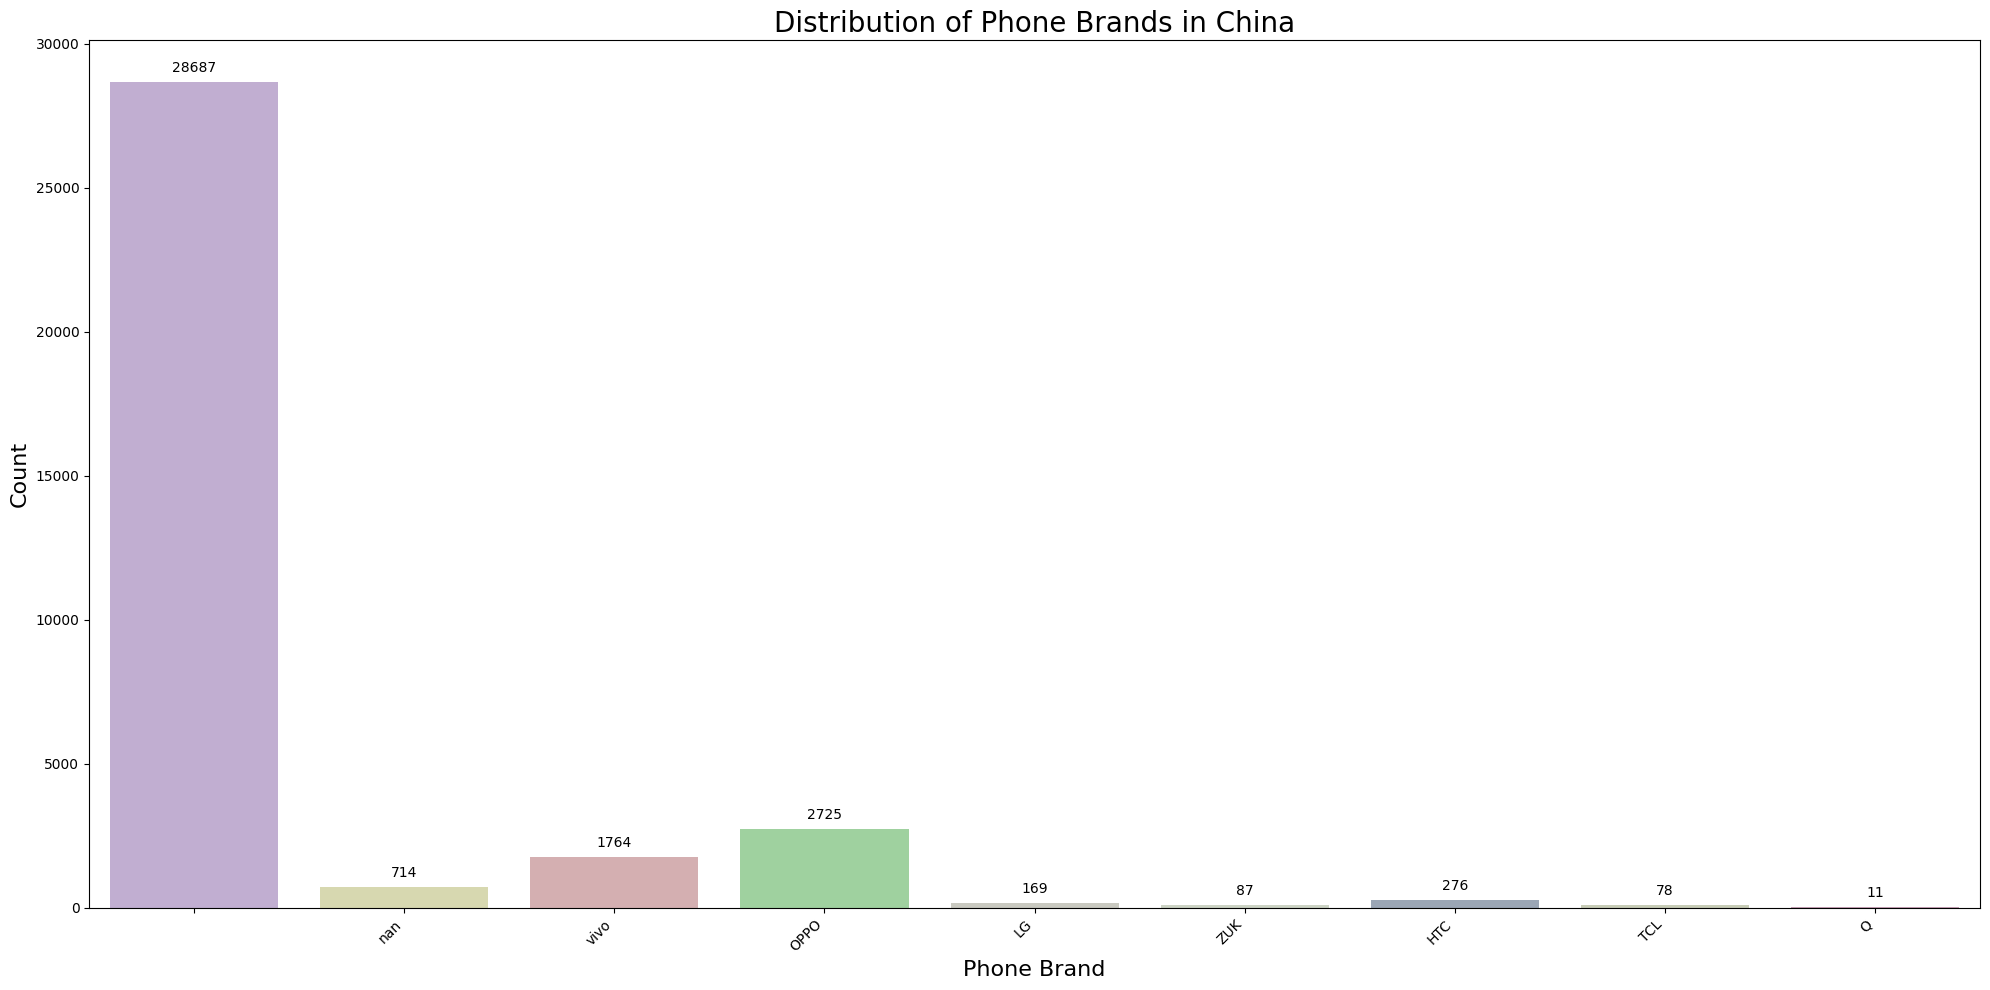


Summary Statistics:
phone_brand
        28687
OPPO     2725
vivo     1764
nan       714
HTC       276
LG        169
ZUK        87
TCL        78
Q          11
Name: count, dtype: int64


In [ ]:
import random

# Define a function to generate a random appealing color palette
def get_random_palette(num_colors):
    colors = []
    for _ in range(num_colors):
        r = random.randint(150, 225)
        g = random.randint(150, 225)
        b = random.randint(150, 225)
        colors.append(f"#{r:02X}{g:02X}{b:02X}")
    return colors

# Generate a random color palette for the number of phone brands
palette = get_random_palette(len(China['phone_brand'].unique()))

# Create the plot
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

# Create the countplot with custom colors
ax = sns.countplot(x='phone_brand', data=China, palette=palette)

# Add labels and title
plt.xlabel('Phone Brand', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Phone Brands in China', fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add bar annotations (counts)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

# Adjust layout for better balance
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print summary statistics
brand_counts = China['phone_brand'].value_counts()
print("\nSummary Statistics:")
print(brand_counts)

It is interesting to note that common brands that are known globaly such as SumSung and Iphone are not top brands in China however Oppo and Vivo which are manufactured in China are top key brands, in addition, brands such as Techno, Huawei and Infinix Brands which are well known in Kenya are not featuring among the top brands in China.

In [ ]:
China["device_model"].value_counts()

,count
device_model,
Mate 7,2040
荣耀6,1991
MI 4,1189
荣耀6 Plus,1151
Galaxy Note 3,997
...,...
H2,0
H1S,0
H1,0


## Missing values in the China Dataframe

In [ ]:

# Calculate missing value counts and percentages
missing_values = China.isnull().sum()
missing_percentages = (missing_values / len(China)) * 100

# Create a DataFrame for better formatting
missing_summary = pd.DataFrame({'Missing Count': missing_values,
                               'Missing Percentage': missing_percentages})

# Print the summary DataFrame
print("Missing Value Summary:")
print(missing_summary)


Missing Value Summary:
                 Missing Count  Missing Percentage
is_installed                 0            0.000000
is_active                    0            0.000000
label_id                     0            0.000000
device_id                    0            0.000000
timestamp                    0            0.000000
longitude                    0            0.000000
latitude                     0            0.000000
gender                   21305           61.733940
age                      21305           61.733940
group                    21305           61.733940
category                     0            0.000000
phone_brand                  0            0.000000
device_model               714            2.068906
phone_brand_eng            714            2.068906


# From above Missing values are only in columns gender, age, group, device model and phone brand, which is understandable as data entries or capture is never 100% thus the data cleaning.

# Mode therefore was applied to help with filling in the missing values, as the rows were deemed important given that the data had already been sampled to free up the memory for tasks.

In [ ]:

# Columns with missing values to fill
columns_to_fill = ['gender', 'age', 'group', 'device_model', 'phone_brand_eng']

# Iterate through the columns and fill missing values with random percentage based on mode
for column in columns_to_fill:
    mode_value = China[column].mode()[0]  # Get the mode of the column
    missing_indices = China[column].isnull()  # Find indices with missing values

    # Calculate random percentage to fill
    fill_percentage = np.random.rand()  # Random number between 0 and 1
    fill_count = int(fill_percentage * missing_indices.sum())  # Number of missing values to fill

    # Select random indices to fill
    fill_indices = np.random.choice(China[missing_indices].index, fill_count, replace=False)

    # Fill the missing values with the mode at the selected indices
    China.loc[fill_indices, column] = mode_value

# Print the DataFrame with filled values
print(China.head(5))

   is_installed  is_active  label_id            device_id  \
0             1          0       302 -2219503002404061794   
1             1          0       548 -3544823830865992041   
2             1          0       713 -3544823830865992041   
3             1          1       549 -7707847491347618527   
4             1          0       405  -593198455553939395   

             timestamp  longitude  latitude gender   age   group  \
0  2016-05-02 06:15:07   107.3125   30.3125    NaN  29.0     NaN   
1  2016-05-01 14:14:20     0.0000    0.0000      M   NaN  M32-38   
2  2016-05-01 14:14:20     0.0000    0.0000      M   NaN     NaN   
3  2016-05-06 05:30:03     0.0000    0.0000      M  44.0    M39+   
4  2016-05-01 00:00:21     0.0000    0.0000      M   NaN  M32-38   

                category phone_brand device_model phone_brand_eng  
0                unknown                      荣耀6              华为  
1           Industry tag         nan          NaN              华为  
2             Servic

In [ ]:
# Columns with missing values to fill
columns_to_fill = ['gender', 'age', 'group', 'device_model', 'phone_brand_eng']

# Iterate through the columns and fill missing values with random percentage based on mode
for column in columns_to_fill:
    mode_value = China[column].mode()[0]  # Get the mode of the column
    missing_indices = China[column].isnull()  # Find indices with missing values

    # Fill all missing values with the mode
    China.loc[missing_indices, column] = mode_value

# Print the DataFrame with filled values
China.head(3)

,is_installed,is_active,label_id,device_id,timestamp,longitude,latitude,gender,age,group,category,phone_brand,device_model,phone_brand_eng
0,1,0,302,-2219503002404061794,2016-05-02 06:15:07,107.3125,30.3125,M,29.0,M32-38,unknown,,荣耀6,华为
1,1,0,548,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,M,29.0,M32-38,Industry tag,nan,Mate 7,华为
2,1,0,713,-3544823830865992041,2016-05-01 14:14:20,0.0000,0.0000,M,29.0,M32-38,Services 1,nan,Mate 7,华为


In [ ]:
# Calculate missing value counts and percentages
missing_values = China.isnull().sum()
missing_percentages = (missing_values / len(China)) * 100

# Create a DataFrame for better formatting
missing_summary = pd.DataFrame({'Missing Count': missing_values,
                               'Missing Percentage': missing_percentages})

# Print the summary DataFrame
print("Missing Value Summary:")
print(missing_summary)

Missing Value Summary:
                 Missing Count  Missing Percentage
is_installed                 0                 0.0
is_active                    0                 0.0
label_id                     0                 0.0
device_id                    0                 0.0
timestamp                    0                 0.0
longitude                    0                 0.0
latitude                     0                 0.0
gender                       0                 0.0
age                          0                 0.0
group                        0                 0.0
category                     0                 0.0
phone_brand                  0                 0.0
device_model                 0                 0.0
phone_brand_eng              0                 0.0


Box Plot for Checking Outliers in Columns of Interest.

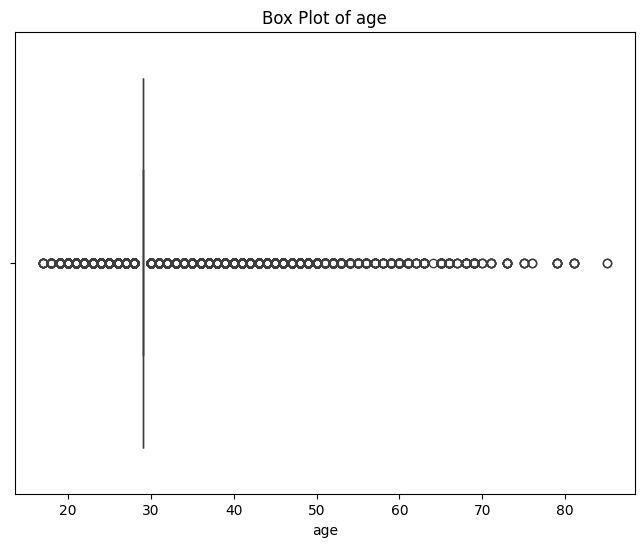

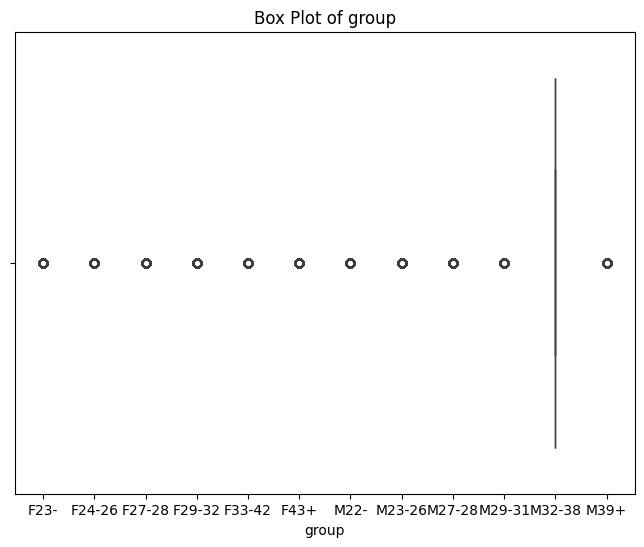

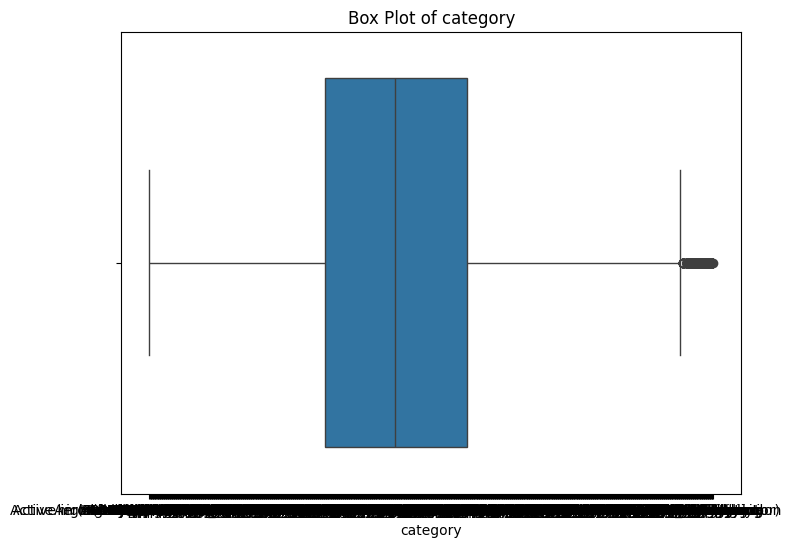

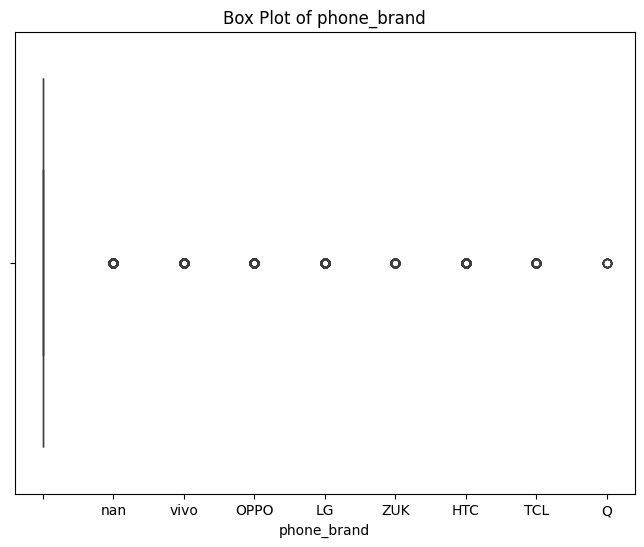

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29256 (\N{CJK UNIFIED IDEOGRAPH-7248}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38738 (\N{CJK UNIFIED IDEOGRAPH-9752}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26149 (\N{CJK UNIFIED IDEOGRAPH-6625}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

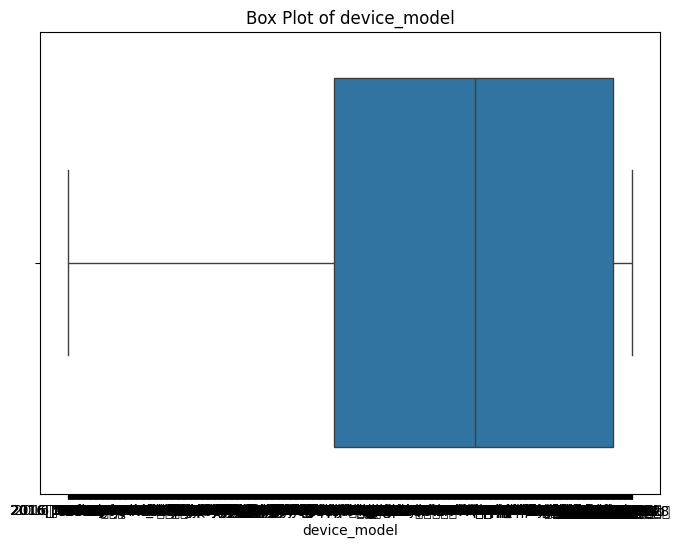

In [ ]:
# Specify the columns for which to create box plots
columns_to_plot = ['age', 'group', 'category', 'phone_brand', 'device_model']

# Create box plots for specified columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=China[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

## Checking Correlation Among Variables

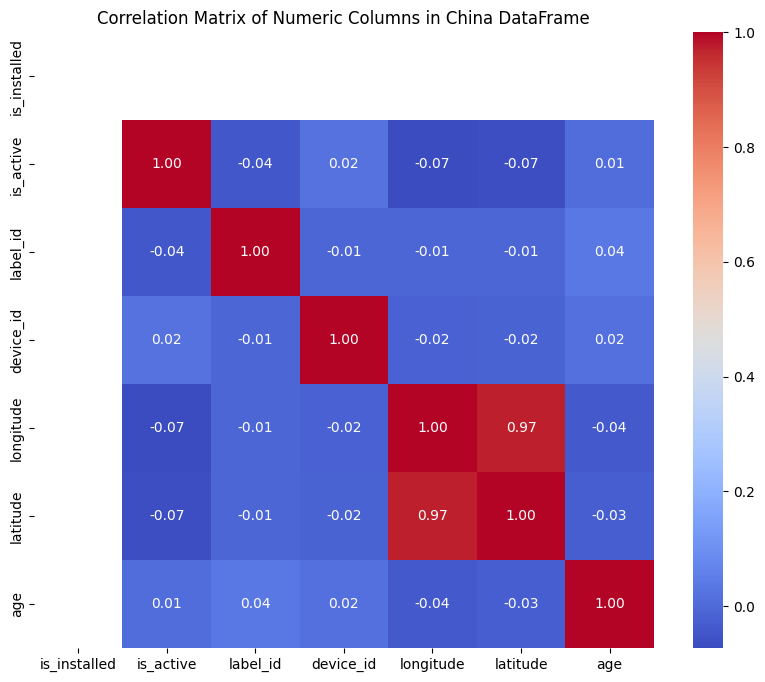

In [ ]:
# Select numeric columns for correlation
numeric_columns = China.select_dtypes(include=np.number).columns

# Create a correlation matrix for numeric columns
correlation_matrix = China[numeric_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns in China DataFrame')
plt.show()

# Latitude and Longitude has strong correlation, because they both relates to geo-location of specific area.
#  Moderate positive correlation observed between age and both longitude and latitude. This could be a result of user demographics or specific geographic areas having a higher concentration of users within a particular age range.


## Part I
#Load your country dataset to the Colab notebook and answer  ANY THREE of the questions below. Your response should be the code and comments in your colab notebook.

# Is there an example of an outlier in your data that surprised you?
Yes, there some outliers with variables on Label categories, apps usage. Another outlier is on the age and brand,and are often known that age affects app usage, and as well brand name also influences usage.
 # Why?
From the plots, it is clear that the older age groups were using certain types of apps more than expected. It can be attributed to a number of factors suchas increased adoption of smartphones among the older adults or specific usage appealing for this age group.

#Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?
One of the histogram showing the app usage by gender was is the most appealing. The male gender tend to use more apps than females.This observation can be attributed to a number of factors such as cultural, social and even economical differences accross the gender.

#Is there a relationship between two columns of your data that you didn't expect? How would you explain it?
 Yes, age and the location ( Longitude and Latitude), this might due to issue on urbanisation, where working population in major cities or locations dealing service industries unlike regions dealing in agricuture or activities that require less usage of phones, thus the differences.

#Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights.
The organizations, that might be interested in the dataset, are Telecommunication Companies and Phone Manufacturing Companies, Health Companies and Financial Companies.
 # Why?
  The data is quite unique because it captures behavioral characteristic on gender, age, and locations, which can either can help for targeted marketing for increased sale, targeted financial literacy, and as well health information for each age group.

#What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.
- Handling of missing values.
- Removing of duplicated records.
- Outlier detection and handling.
 Missing values were handled by Using the Mode especialy for the variables, where an algorithm used to randomly fill in the missing values using the most frequent value in rationed format.

#Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.
 Done
#Bonus - What’s one question you would have asked that is not included, and how would you answer it?

How does app usage varies accross the socio-economic groups?

The behavioral science from analysis of the relationship between app usage and income levels from the data can help provide insights on the impact of socio-economical factors as result of mobile phones. This can help in planning and targeted marketing.

### PART II:
##Watch the video on  Discussion Analytics to AI.
# In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.

The biggest takeaway from the video is the importance of defining AI initiatives based on clear objective functions forms the framework and outline on knwoing the kind of features required from the data available. It ensures that algorithms  and analytics align with business values and address the right problems such as profit and cost through optimization of the constraints. By identifying the key metrics tied to these objectives, organizations can measure progress, track performance, and drive meaningful impact.


Feature engineering.

In [ ]:
# One-hot encoding for categorical features
China = pd.get_dummies(China, columns=['gender', 'group', 'category', 'phone_brand', 'device_model'])

Data Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features using standardization
scaler = StandardScaler()
numerical_features = ['age', 'longitude', 'latitude']  # Add other numerical features
China[numerical_features] = scaler.fit_transform(China[numerical_features])

In [ ]:
# prompt: help generate code for-Create engagement-related features: Derive new features from your existing data that directly reflect user engagement. For example, calculate the total time spent using the app, the frequency of app usage, the number of different app features used, or the average session duration.

# Calculate total time spent using the app (assuming you have a 'time_spent' column)
China['total_time_spent'] = China.groupby('device_id')['time_spent'].transform('sum')

# Calculate frequency of app usage (assuming you have an 'event_timestamp' column)
China['app_usage_frequency'] = China.groupby('device_id')['event_timestamp'].transform('count')

# Calculate the number of different app features used (assuming you have a 'feature_used' column)
China['features_used'] = China.groupby('device_id')['feature_used'].transform('nunique')

# Calculate the average session duration (assuming you have a 'session_duration' column)
China['avg_session_duration'] = China.groupby('device_id')['session_duration'].transform('mean')

# Display the updated DataFrame
print(China[['device_id', 'total_time_spent', 'app_usage_frequency', 'features_used', 'avg_session_duration']].head())

KeyError: 'Column not found: time_spent'